In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Problem 1**: 10 pts - Here is a cubic polynomial with three closely spaced real roots:

$$
p(x) = 816x^3 - 3835x^2 + 6000x - 3125
$$

* What are the exact roots of p?
* Plot $p(x)$ for $1.43\leq x \leq 1.71$.  Show the location of the three roots.  
* Starting with $x_{0}=1.5$, what does Newton's method do?
* Starting with $x_{0}=1$ and $x_{1}=2$, what does the secant method do?
* Starting with the interval $[1,2]$, what does bisection do?

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


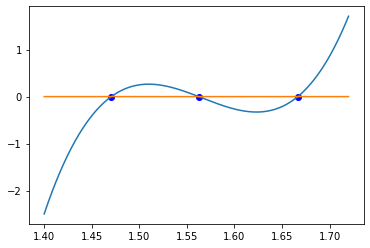

In [46]:
def f(x):
    return 816*x**3 - 3835*x**2 + 6000*x - 3125
def zero(x):
    return 0

xvals = np.linspace(1.4, 1.72, 1e4)
yvals = [f(xval) for xval in xvals]
zvals = [zero(xval) for xval in xvals]
x1 = 25/17
x2 = 25/16
x3 = 5/3
plt.plot(xvals, yvals)
plt.plot(xvals, zvals)
plt.scatter([x1, x2, x3], [0, 0, 0], c = 'b')

In [30]:
f = lambda x: 816*x**3 - 3835*x**2 + 6000*x - 3125
fp = lambda x: 2448*x**2 - 7670*x + 6000

def Newtons_method(f,fp,x0,tol):
    x1 = x0 - f(x0)/fp(x0)
    xapprox = np.array([x0,x1])
    while np.abs(x1-x0) > tol:
        x0 = x1
        x1 = x0 - f(x0)/fp(x0)
        xapprox = np.append(xapprox,x1)
    print("Your root is %1.15f" %x1)  
    return x1
    #rate_of_conv(xapprox)
    

print(Newtons_method(f,fp,1.5,1e-4))

Your root is 1.470588235275899
1.4705882352758994


Since Newtons Method, uses the tangent line approximation to find a root, it finds the first root of $$x_{0} = \frac{25}{17}$$ at $x_{0} = 1.5$. This is when the tangent line intersects closest to the root itself.

In [29]:
def secant_method_mod(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1 - x0)/(f1 - f0)
    xapprox = np.array([x0, x1, x2])
    while np.abs(x1 - x0) >= tol:
        x0 = x1
        x1 = x2
        f0 = f1 
        f1 = f(x1)
        x2 = x1 - f1*(x1 - x0)/(f1 - f0)
        xapprox = np.append(xapprox, x2)
    return x2
print(secant_method_mod(f,1,2,1e-4))

1.666666666667267


For the secant method, we use the interval given to calculate $$x_{2}$$ until the root is found.

In [33]:
def bisec_method(a,b,f,tol):
    d = b
    fa,fb = f(a),f(b)
    if fa*fb < 0:
        c = (b+a)/2
        capproxs = np.array([c]) # build an array to record the estimates we make for the root
        fc = f(c)
        while np.abs(fc) >= tol:
            if fa*fc < 0:
                b = c
            else:
                fa = fc
                a = c
                
            c = (a+b)/2
            fc = f(c)
            capproxs = np.append(capproxs,c)
            
        print ("Our root is: %1.15f" %c)
        return capproxs
    else:
        print ("Cannot ensure existence of root.")
print(bisec_method(1,2,f,1e-4))

Our root is: 1.470588684082031
1.4705886840820312


The bisection method calculates between interval $$[a,b]$$ by continuoulsy finding midpoints and there values. If the function value switches signs, we have iterated over a root and will calculate accordingly. This is done until the function value is near zero.

**Problem 2**: 10 pts - Find the first ten positive values of $x$ such that $x = \tan(x)$.  Explain your choice of root finding method for doing this, and explain how you are certain that you have found the first ten positive values.  

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


(-1, 1)

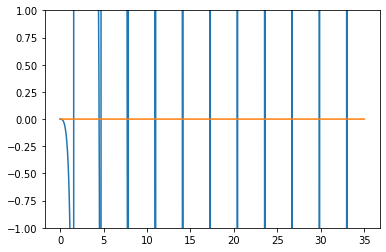

In [73]:
tan = np.tan

t = lambda x: x - tan(x)
def t(x):
    return x - tan(x)

xvals = np.linspace(0, 35, 1e4)
yvals = [t(xval) for xval in xvals]
plt.plot(xvals, yvals)
plt.plot(xvals, zvals)
plt.ylim(-1, 1)

This plot shows when x - tan(x) = 0, thus showing when x = tan(x). The interval given shows at leats 10 iterations. From this point we can gain intuition about the intervals of which the roots lie on. From then on we can use the bisection method to find the exact root.

In [72]:
tp = lambda x: 1 - 1/(np.cos(x))**2


print(bisec_method(4.4,4.5,t,1e-4))
print(bisec_method(7.7,7.8,t,1e-4))
print(bisec_method(10.9,10.95,t,1e-4))
print(bisec_method(14.,14.1,t,1e-4))
print(bisec_method(17.2,17.25,t,1e-4))
print(bisec_method(20.3,20.4,t,1e-4))
print(bisec_method(23.5,23.55,t,1e-4))
print(bisec_method(26.6,26.7,t,1e-4))
print(bisec_method(29.81,29.82,t,1e-4))
print(bisec_method(32.95,32.96,t,1e-4))

Our root is: 4.493408203125001
4.493408203125001
Our root is: 7.725250244140625
7.725250244140625
Our root is: 10.904121398925779
10.90412139892578
Our root is: 14.066194152832031
14.066194152832031
Our root is: 17.220755004882811
17.22075500488281
Our root is: 20.371302795410159
20.37130279541016
Our root is: 23.519452667236326
23.519452667236326
Our root is: 26.666054153442381
26.66605415344238
Our root is: 29.811598815917968
29.811598815917968
Our root is: 32.956389007568362
32.95638900756836


**Problem 3**: 10 pts - Suppose that we interpolate over three points, say $x_{j-1}$, $x_{j}$, $x_{j+1}$, with data $f_{j-1}$, $f_{j}$, and $f_{j+1}$, where our nodes are equally spaced so that 

$$
\delta x = x_{j+1} - x_{j} = x_{j} - x_{j-1}.
$$

Thus we can write 

$$
x_{j+1} = x_{j} + \delta x, ~ x_{j-1} = x_{j} - \delta x,
$$

As we discussed in class, for an unknown function $f(x)$, we can generate an interpolatory second-order approximation $P_{2}(x)$, $f(x)\approx P_{2}(x)$, where

$$
P_{2}(x) = f_{j-1}\frac{(x-x_{j})(x-x_{j+1})}{(x_{j-1}-x_{j})(x_{j-1}-x_{j+1})} + f_{j}\frac{(x-x_{j-1})(x-x_{j+1})}{(x_{j}-x_{j-1})(x_{j}-x_{j+1})} + f_{j+1}\frac{(x-x_{j-1})(x-x_{j})}{(x_{j+1}-x_{j-1})(x_{j+1}-x_{j})}
$$

Show that 

* (4pts) $P_{2}(x) = \frac{1}{2\delta x^{2}}\left(f_{j-1}\tilde{x}(\tilde{x}-\delta x) - 2f_{j}(\tilde{x}-\delta x)(\tilde{x}+\delta x) + f_{j+1}\tilde{x}(\tilde{x}+\delta x)\right)$, $\tilde{x} = x-x_{j}$.

* (3pts) $P'_{2}(x_{j}) = \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1} \right)$.  Letting $f'(x_{j})\approx P'_{2}(x_{j})$ is known as a _centered difference_ approximation to a derivative of a function.

* (3pts) $P''_{2}(x_{j}) = \frac{1}{\delta x^{2}}\left(f_{j+1} - 2f_{j} + f_{j-1}\right)$

3a)
$$
\tilde{x} = x-x_{j} \\
x_{j-1} - x_{j+1} = x_{j} - \delta x - (x_{j} + \delta x) = -2\delta x \\
x - x_{j + 1} = \tilde{x} + x_{j+1} - \delta x - x_{j+1} = \tilde{x} - \delta x \\
x - x_{j-1} = \tilde{x} + \delta x \\
x_{j + 1} - x_{j-1} = 2 \delta x \\
$$

After substitution we see that
$$
P_{2}(x) = f_{j-1}\frac{(\tilde{x})(\tilde{x} - \delta x)}{(-2\delta x)^{2}} + f_{j}\frac{(\tilde{x} + \delta x)(\tilde{x} - \delta x)}{(\delta x)(-\delta x)} + f_{j+1}\frac{(\tilde{x} + \delta x)(\tilde{x})}{(2\delta x)(\delta x )}
$$

$$
P_{2}(x) = f_{j-1}\frac{(\tilde{x})(\tilde{x} - \delta x)}{(-2\delta x)^{2}} + f_{j}\frac{(\tilde{x} + \delta x)(\tilde{x} - \delta x)}{(-\delta x)^{2}} + f_{j+1}\frac{(\tilde{x} + \delta x)(\tilde{x})}{(2\delta x)^{2}}
$$

factoring out $\frac{1}{2}$ we get
$$
P_{2}(x) = \frac{1}{2\delta x^{2}}\left(f_{j-1}\tilde{x}(\tilde{x}-\delta x) - 2f_{j}(\tilde{x}-\delta x)(\tilde{x}+\delta x) + f_{j+1}\tilde{x}(\tilde{x}+\delta x)\right)
$$

3b)
$$
P_{2}(x) = L_{0}(f_{j-1}) + L_{1}(f_{j}) + L_{2}(f_{j+1})
$$
Further we write:
\begin{align}
L_{0}(x) = \frac{(x-x_{j})(x-x_{j+1})}{(x_{j-1}-x_{j})(x_{j-1}-x_{j+1})} \\
L_{1}(x) = \frac{(x-x_{j-1})(x-x_{j+1})}{(x_{j}-x_{j-1})(x_{j}-x_{j+1})}\\
L_{2}(x) = \frac{(x-x_{j-1})(x-x_{j})}{(x_{j+1}-x_{j-1})(x_{j+1}-x_{j})}\\ 
\end{align}
We then derive the following:
\begin{align}
L_{0}^{'}(x_{j}) = \frac{2x_{j} - x_{j} - x_{j+1}}{(x_{j-1}-x_{j})(x_{j-1}-x_{j+1})}  = \frac{x_{j} - x_{j+1}}{(x_{j-1}-x_{j})(x_{j-1}-x_{j+1})} = \frac{-\delta x}{(- \delta x) (-2 \delta x)} = -\frac{1}{2 \delta x}\\
L_{1}^{'}(x_{j}) = \frac{2x_{j} - x_{j-1} - x_{j+1}}{(x_{j}-x_{j-1})(x_{j}-x_{j+1})} = 0\\
L_{2}^{'}(x_{j}) = \frac{2x_{j} - x_{j-1} - x_{j}}{(x_{j+1}-x_{j-1})(x_{j+1}-x_{j})} = \frac{x_{j} - x_{j-1}}{(x_{j+1}-x_{j-1})(x_{j+1}-x_{j})} = \frac{\delta x}{(2 \delta x)( \delta x)} = \frac{1}{2 \delta x}\\ 
\end{align}
Solve for the derivative for $P_{2}(x_{j})$ to get:
$$
P'_{2}(x_{j}) =  -\frac{1}{2 \delta x}(f_{j-1}) + \frac{1}{2 \delta x}(f_{j+1}) 
$$
which simplified gets us:
$$
P'_{2}(x_{j}) = \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1} \right)
$$

3c)
\begin{align}
L_{0}^{'}(x_{j}) = \frac{2}{(x_{j-1}-x_{j})(x_{j-1}-x_{j+1})} = \frac{2}{(- \delta x) (-2 \delta x)} = \frac{1}{\delta x^{2}}\\
L_{1}^{'}(x_{j}) = \frac{2}{(x_{j}-x_{j-1})(x_{j}-x_{j+1})} = \frac{2}{(\delta x)(- \delta x)} = \frac{-2}{\delta x^{2}}\\
L_{2}^{'}(x_{j}) = \frac{2}{(x_{j+1}-x_{j-1})(x_{j+1}-x_{j})} = \frac{2}{(2 \delta x)( \delta x)} = \frac{1}{\delta x^{2}}\\ 
\end{align}
Plugging back in for $P''_{2}(x_{j})$ we get:
$$
P''_{2}(x_{j}) = \frac{1}{\delta x^{2}} (f_{j-1}) +  \frac{-2}{\delta x^{2}} (f_{j}) + \frac{1}{\delta x^{2}} (f_{j+1})
$$

$$
P''_{2}(x_{j}) =\frac{1}{\delta x^{2}}\left(f_{j+1} - 2f_{j} + f_{j-1}\right)
$$

**Problem 4**: 10 pts 
* (3 pts) Using $f(x) = \cos(x)$, determine the accuracy of your centered difference approximations for $f'(x_{j})$ and $f''(x_{j})$ with respect to the magnitude of $\delta x$.  In other words, if we suppose that 
$$
f'(x_{j}) = \frac{f_{j+1}-f_{j-1}}{2\delta x} + C\delta x^{p},
$$
then find $p$.  Note, in order to measure the error in our approximations, we look at points $x_{j}\in[0, 2\pi]$ where $\delta x = 2\pi/N$ so that
$$
x_{j} = \frac{2\pi j}{N}, ~j=0, \cdots, N.
$$
We plot the maximum of the absolute value of the error in our approximation over our chosen interval for increasing choices of $N$.

* (3 pts) Using $P_{4}(x)$, derive a centered difference approximation for $f'(x_{j})$ using the equally spaced nodes $x_{j-2}$, $x_{j-1}$, $x_{j}$, $x_{j+1}$, $x_{j+2}$, with corresponding node spacing $\delta x$, and corresponding data $f_{j-2}$, $f_{j-1}$, $f_{j}$, $f_{j+1}$, $f_{j+2}$.  Note, you'll need to first show that 
\begin{multline}
P_{4}(x) = \frac{1}{(\delta x)^{4}}\left(\frac{f_{j-2}}{4!}(\tilde{x}+\delta x)\tilde{x}(\tilde{x}-\delta x)(\tilde{x}-2\delta x) -\frac{f_{j-1}}{3!}(\tilde{x}+2\delta x)\tilde{x}(\tilde{x}-\delta x)(\tilde{x}-2\delta x) + \frac{f_{j}}{4}(\tilde{x}+2\delta x)(\tilde{x}+\delta x)(\tilde{x}-\delta x)(\tilde{x}-2\delta x)\right.\\
\left.-\frac{f_{j+1}}{3!}(\tilde{x}+2\delta x)(\tilde{x}+\delta x)\tilde{x}(\tilde{x}-2\delta x)+ \frac{f_{j+2}}{4!}(\tilde{x}+2\delta x)(\tilde{x}+\delta x)\tilde{x}(\tilde{x}-\delta x)\right)
\end{multline}
where again $\tilde{x}=x-x_{j}$.  I know this looks nasty, but if you see the underlying pattern, it's not nearly as bad.

* (4 pts) Determine the order of accuracy of your five point approximation again using $f(x) = \cos(x)$ using the same approach you used in the first part of this problem.  

